In [1]:
pip install scikit-learn numpy matplotlib pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Mean Absolute Error (MAE): $10130.08
Mean Squared Error (MSE): $144755426.00
Root Mean Squared Error (RMSE): $12031.43


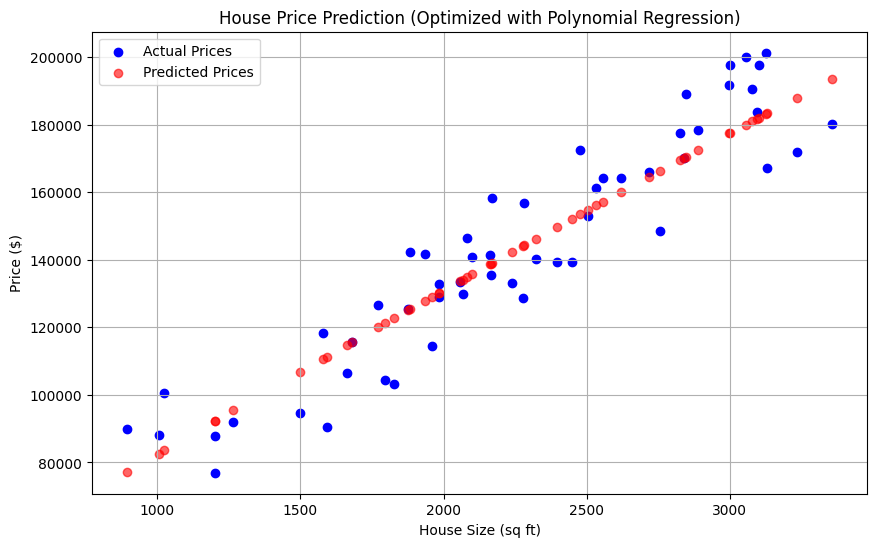

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate synthetic data (house sizes in square feet & prices in $1000s)
np.random.seed(42)
house_size = np.random.randint(800, 3500, 300).reshape(-1, 1)  # More data points
house_price = house_size * 50 + np.random.randint(10000, 50000, 300).reshape(-1, 1)  # Price in $

# Convert to DataFrame
df = pd.DataFrame({'House Size (sq ft)': house_size.flatten(), 'Price ($)': house_price.flatten()})

# Outlier Removal: Remove extremely high or low house prices
df = df[(df['Price ($)'] > df['Price ($)'].quantile(0.05)) & (df['Price ($)'] < df['Price ($)'].quantile(0.95))]

# Splitting Data
X = df[['House Size (sq ft)']]
y = df[['Price ($)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the Features (Feature Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using Polynomial Regression (degree = 2 for better fit)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.scatter(X_test, y_pred, color='red', label="Predicted Prices", alpha=0.6)
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price ($)")
plt.title("House Price Prediction (Optimized with Polynomial Regression)")
plt.legend()
plt.grid()
plt.show()
